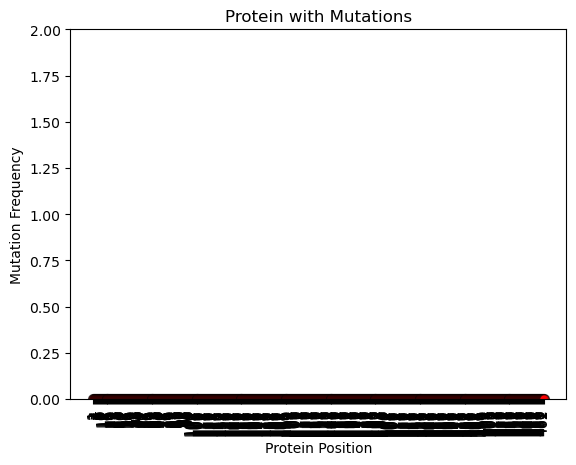

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('mutated_dataset.csv')
data.head(5)

# Sample data
protein_length = 462
wildtype_sequence = 'MLLLARCLLLVLVSSLLVCSGLACGPGRGFGKRRHPKKLTPLAYKQFIPNVAEKTLGASGRYEGKISRNSERFKELTPNYNPDIIFKDEENTGADRLMTQRCKDKLNALAISVMNQWPGVKLRVTEGWDEDGHHSEESLHYEGRAVDITTSDRDRSKYGMLARLAVEAGFDWVYYESKAHIHCSVKAENSVAAKSGGCFPGSATVHLEQGGTKLVKDLSPGDRVLAADDQGRLLYSDFLTFLDRDDGAKKVFYVIETREPRERLLLTAAHLLFVAPHNDSATGEPEASSGSGPPSGGALGPRALFASRVRPGQRVYVVAERDGDRRLLPAAVHSVTLSEEAAGAYAPLTAQGTILINRVLASCYAVIEEHSWAHRAFAPFRLAHALLAALAPARTDRGGDSGGGDRGGGGGRVALTAPGAADAPGAGATAGIHWYSQLLYQIGTWLLDSEALHPLGMAVKSS'  # Example wildtype sequence
mutations = str(data['Protein Change'])
freq = data['Protein Change'].value_counts()


# Create a figure and axis
fig, ax = plt.subplots()

# Plot lollipops for wildtype sequence
ax.vlines(range(1, protein_length + 1), ymin=0, ymax=0, color='skyblue', alpha=0.7, linewidth=2)  # Plot empty sticks
ax.scatter(range(1, protein_length + 1), [0] * protein_length, color='red', s=50, edgecolor='k', alpha=0.7)  # Plot scatter points at y=0


            
# Plot mutations
for mutation in mutations:
    if 'Fusion' not in mutation and '_splice' not in mutation:  # Ignore fusion and splice mutations
        if 'fs' in mutation:  # Check for frameshift mutations
            # Split the mutation at 'fs'
            parts = mutation.split('fs')
            # Extract the numeric part of the position
            pos_str = ''.join(filter(str.isdigit, parts[0]))
            if pos_str:  # Check if pos_str is not empty
                pos = int(pos_str)
                ax.vlines(pos, ymin=0, ymax=1, color='orange', alpha=0.8, linewidth=3)  # Plot sticks for frameshift mutations
                ax.scatter(pos, 1, color='blue', s=60, edgecolor='k', alpha=0.9)  # Plot scatter points at y=1 (above wildtype) for frameshift mutations
        elif '_splice' in mutation:  # Handle splice mutations
            # Process splice mutations here
            pass  # Placeholder, replace with actual handling code if needed
        else:  # Handle other mutations
            if len(mutation) >= 3:  # Ensure mutation string has at least three characters (original_aa, position, new_aa)
                original_aa, pos, new_aa = mutation[0], int(mutation[1:-1]), mutation[-1]
                ax.vlines(pos, ymin=0, ymax=1, color='skyblue', alpha=0.7, linewidth=2)  # Plot sticks for mutations
                ax.scatter(pos, 1, color='red', s=50, edgecolor='k', alpha=0.7)  # Plot scatter points at y=1 (above wildtype)

            
# Set labels and title
ax.set_xlabel('Protein Position')
ax.set_ylabel('Mutation Frequency')
ax.set_title('Protein with Mutations')

# Customize x-axis ticks to show only integers
plt.xticks(range(1, protein_length + 1), rotation=90)

# Set y-axis limit to show mutation markers
plt.ylim(0, 2)

# Show plot
plt.show()


ValueError: could not broadcast input array from shape (157,) into shape (172,)

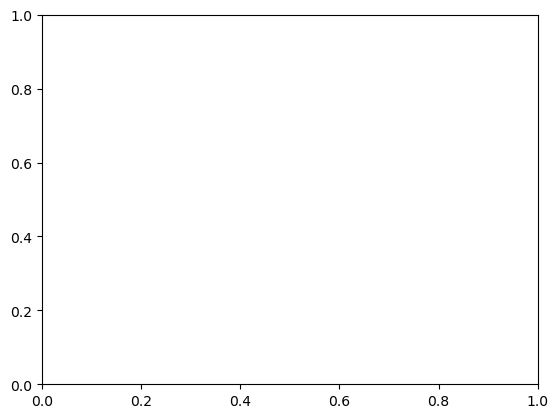

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

data = pd.read_csv('mutated_dataset.csv')

# Sample data
protein_length = 462
wildtype_sequence = 'MLLLARCLLLVLVSSLLVCSGLACGPGRGFGKRRHPKKLTPLAYKQFIPNVAEKTLGASGRYEGKISRNSERFKELTPNYNPDIIFKDEENTGADRLMTQRCKDKLNALAISVMNQWPGVKLRVTEGWDEDGHHSEESLHYEGRAVDITTSDRDRSKYGMLARLAVEAGFDWVYYESKAHIHCSVKAENSVAAKSGGCFPGSATVHLEQGGTKLVKDLSPGDRVLAADDQGRLLYSDFLTFLDRDDGAKKVFYVIETREPRERLLLTAAHLLFVAPHNDSATGEPEASSGSGPPSGGALGPRALFASRVRPGQRVYVVAERDGDRRLLPAAVHSVTLSEEAAGAYAPLTAQGTILINRVLASCYAVIEEHSWAHRAFAPFRLAHALLAALAPARTDRGGDSGGGDRGGGGGRVALTAPGAADAPGAGATAGIHWYSQLLYQIGTWLLDSEALHPLGMAVKSS'  # Example wildtype sequence
mutations = str(data['Protein Change'])
freq = data['Protein Change'].value_counts()

# Apply the function to extract positions only for the mutated dataset
def extract_position(protein_change):
    if pd.isnull(protein_change):
        return np.nan
    match = re.match(r'[A-Za-z](\d+)[A-Za-z]', protein_change)
    if match:
        return int(match.group(1))
    return np.nan

# Position data 
data['Protein Change Position'] = data['Protein Change'].apply(extract_position)
position_numbs = data['Protein Change Position']
position_numbs.dropna()



# stem plots 
x = position_numbs.dropna()
y = freq
plt.stem(x, y)
plt.show()